In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
outbreak = pd.read_csv('/Users/Joey/Downloads/FallQuarter/CSE583/pyEpiDisplay/Outbreak.csv', sep = ',')

In [25]:
outbreak.head()

,id,sex,age,exptime,beefcurry,saltegg,eclair,water,onset,nausea,vomiting,abdpain,diarrhea
0,1,1,13,2.533083e+13,1,1,1.0,1,2.533083e+13,1,1,1,1
1,2,1,14,2.533083e+13,1,1,0.0,1,NaN,0,0,0,0
2,3,1,13,2.533083e+13,1,1,0.0,1,NaN,0,0,0,0
3,4,1,15,2.533083e+13,1,1,0.5,1,NaN,0,0,0,0
4,5,1,14,2.533083e+13,1,1,0.0,1,NaN,0,0,0,0


Pandas framework read_csv function would automatically use scientific notation for large numbers. To avoid this, we can use the dtype parameter to specify the data type of the column as string. However, it will lose mathmatical operations on that column.

In [26]:
outbreak_age = outbreak['age'].value_counts().sort_index()
outbreak_age

age
1       2
6       1
8       1
9       6
10     11
11     56
12     58
13     68
14     95
15    110
16     71
17     55
18     62
19     55
20     61
21     36
22     44
23     23
24     24
25     10
26     24
27     19
28     19
29     12
30     21
31     13
32      9
33      4
34      8
35      9
36      4
37      1
38      6
39      3
40      3
41      3
42      1
43      3
44      4
45      2
46      5
47      2
48      2
49      1
50      5
51      1
58      1
99     60
Name: count, dtype: int64

In [27]:
type(outbreak_age)

pandas.core.series.Series

need to convert outbreak_age into a DataFrame

In [28]:
outbreak_age_df = outbreak_age.reset_index('age')
outbreak_age_df.columns = ['age', 'frequency']
outbreak_age_df = outbreak_age_df.set_index('age')
outbreak_age_df

,frequency
age,
1,2
6,1
8,1
9,6
10,11
11,56
12,58
13,68
14,95


In [29]:
outbreak_age_df["percent"] = (outbreak_age_df['frequency'] / len(outbreak) * 100).round(1)
outbreak_age_df

,frequency,percent
age,,
1,2,0.2
6,1,0.1
8,1,0.1
9,6,0.5
10,11,1.0
11,56,5.1
12,58,5.3
13,68,6.2
14,95,8.7


In [30]:
# calculate the cumulative percent
outbreak_age_df['cum.percent'] = outbreak_age_df['percent'].cumsum()
outbreak_age_df

,frequency,percent,cum.percent
age,,,
1,2,0.2,0.2
6,1,0.1,0.3
8,1,0.1,0.4
9,6,0.5,0.9
10,11,1.0,1.9
11,56,5.1,7.0
12,58,5.3,12.3
13,68,6.2,18.5
14,95,8.7,27.2


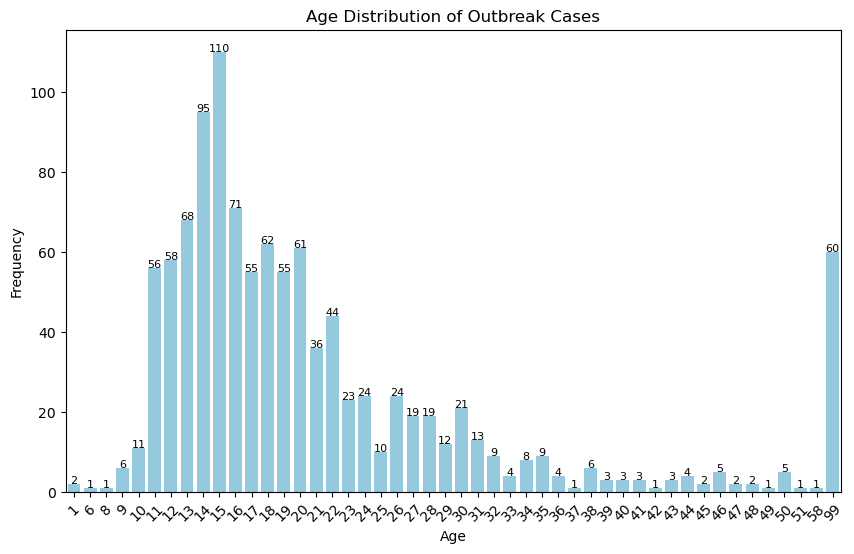

In [31]:
# plot the bar chart of frequency
plt.figure(figsize=(10,6))
sns.barplot(x=outbreak_age_df.index, y='frequency', data=outbreak_age_df, color='skyblue')
# denote the counts on top of the bars, change text size if needed
for index, value in enumerate(outbreak_age_df['frequency']):
    plt.text(index, value, str(value), ha='center', fontsize=8) # str
plt.title('Age Distribution of Outbreak Cases')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()